In [9]:
# Importamos las librerias de interes
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [11]:
# Leemos el fichero de Demanda de electricidad descargado anteriormente desde la API de REE-ESIOS
RAW = pd.read_csv('REE_demanda_real.csv')
RAW.head(2)

,datetime_utc,demanda,datetime_CET
0,2013-12-31T23:00:00Z,24546.0,2014-01-01 00:00
1,2013-12-31T23:10:00Z,24309.0,2014-01-01 00:10


In [12]:
# Seleccionamos las columnas de interes y las renombramos
DEM = RAW[['datetime_CET','demanda']]
DEM.columns = ['fecha','demanda']

In [13]:
# Asignamos a la columna fecha el caracter temporal y la establecemos como indice de la serie
DEM.loc[:,'fecha'] = pd.DatetimeIndex(pd.to_datetime(DEM['fecha']))
DEM.set_index(DEM['fecha'],inplace=True)
DEM.drop('fecha',axis=1,inplace=True)

In [15]:
# Creamos alguna variables utiles
DEM.loc[:,'weekday'] = DEM.index.strftime('%a')
DEM.loc[:,'month']   = DEM.index.strftime('%b')
DEM.loc[:,'HHMM']    = DEM.index.strftime('%H:%M')
DEM.head()

,demanda,weekday,month,HHMM
fecha,,,,
2014-01-01 00:00:00,24546.0,Wed,Jan,00:00
2014-01-01 00:10:00,24309.0,Wed,Jan,00:10
2014-01-01 00:20:00,24348.0,Wed,Jan,00:20
2014-01-01 00:30:00,24321.0,Wed,Jan,00:30
2014-01-01 00:40:00,24194.0,Wed,Jan,00:40


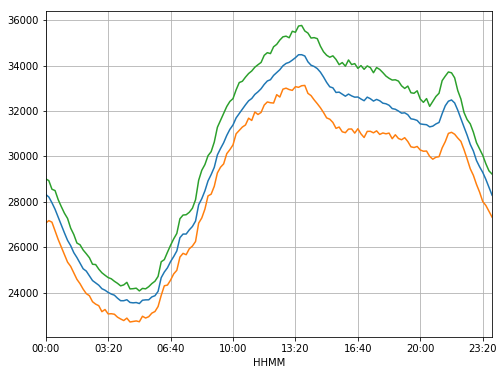

In [11]:
# Dia tipico
month = 'Aug' ; weekday = 'Fri' 

SEL = DEM.loc[(DEM['weekday'] == weekday) & (DEM['month'] == month)]

# Group-by
GB = SEL.groupby('HHMM')

fig, ax = plt.subplots(figsize=(8,6))
GB.mean().plot(ax=ax,legend=False)
GB.quantile(0.25).plot(ax=ax,legend=False)
GB.quantile(0.75).plot(ax=ax,legend=False,grid=True)

In [12]:
# Demanda media horaria
DEMH = DEM.resample('1H').mean()

In [13]:
DEMH.head()

,demanda
fecha,
2014-01-01 00:00:00,24301.666667
2014-01-01 01:00:00,23365.333333
2014-01-01 02:00:00,21672.500000
2014-01-01 03:00:00,20192.000000
2014-01-01 04:00:00,19220.666667


In [14]:
DEMH.loc[:,'weekday'] = DEMH.index.strftime('%a')
DEMH.loc[:,'month']   = DEMH.index.strftime('%b')
DEMH.loc[:,'HH']    = DEMH.index.strftime('%H')

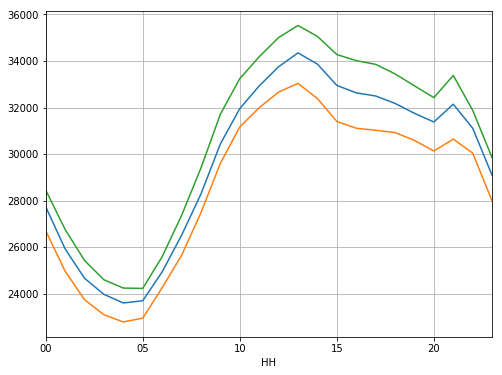

In [15]:
# Dia tipico
month = 'Aug' ; weekday = 'Fri' 

SEL = DEMH.loc[(DEMH['weekday'] == weekday) & (DEMH['month'] == month)]

# Group-by
GB = SEL.groupby('HH')

fig, ax = plt.subplots(figsize=(8,6))
GB.mean().plot(ax=ax,legend=False)
GB.quantile(0.25).plot(ax=ax,legend=False)
GB.quantile(0.75).plot(ax=ax,legend=False,grid=True)

In [16]:
import statsmodels.graphics.tsaplots as tsaplots

In [17]:
A = DEMH['demanda'].values

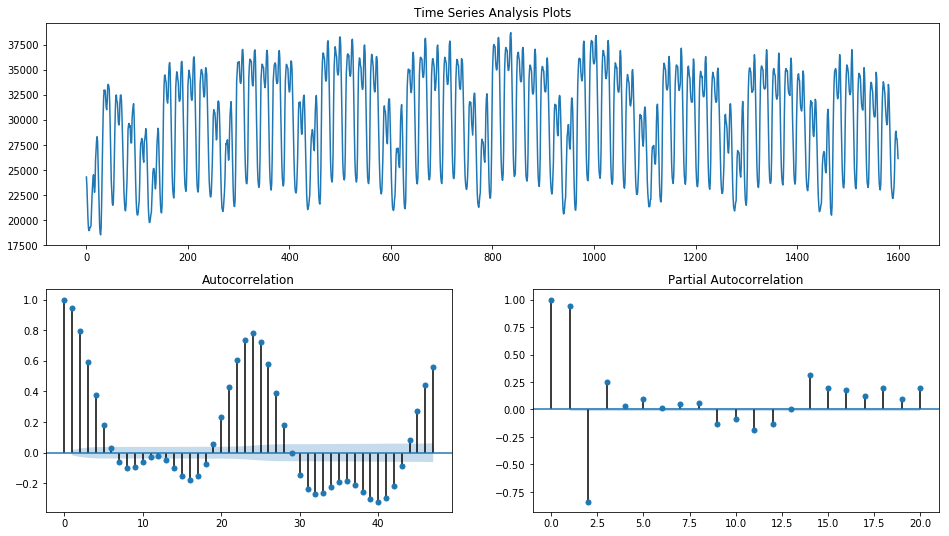

In [19]:
fig = plt.figure(figsize=(16,9))
layout = (2, 2)
y = A[:1600] ; lags = np.arange(0,21,1)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))
_ = ts_ax.plot(y)
ts_ax.set_title('Time Series Analysis Plots')
_ = tsaplots.plot_acf(y, lags=np.arange(0,48,1), ax=acf_ax, alpha=0.5)
_ = tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

In [22]:
# Demanda media diaria
DEMD = DEM.resample('1D').mean()

In [23]:
DEMD.loc[:,'weekday'] = DEMD.index.strftime('%a')
DEMD.loc[:,'month']   = DEMD.index.strftime('%b')

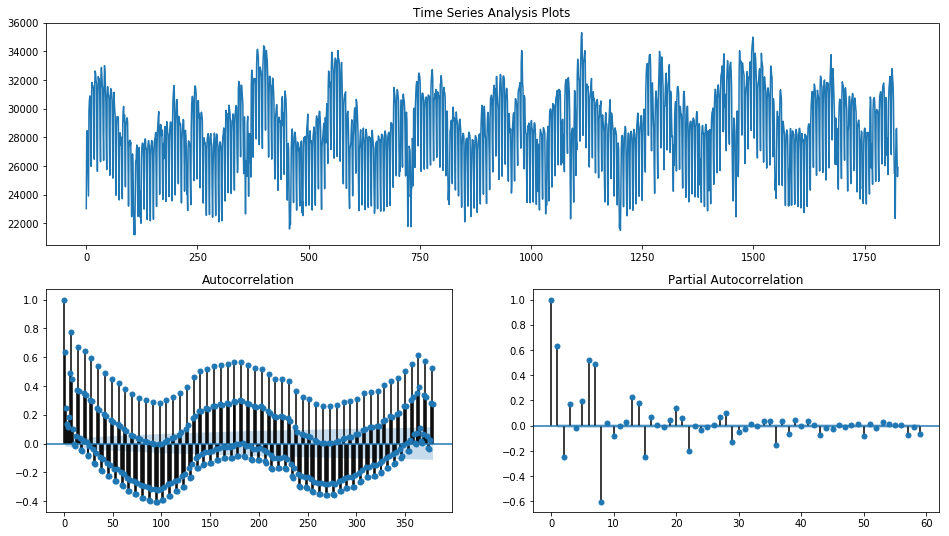

In [27]:
fig = plt.figure(figsize=(16,9))
layout = (2, 2)
A = DEMH['demanda'].values ; y = A ; lags = np.arange(0,60,1)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))
_ = ts_ax.plot(y)
ts_ax.set_title('Time Series Analysis Plots')
_ = tsaplots.plot_acf(y, lags=np.arange(0,380,1), ax=acf_ax, alpha=0.5)
_ = tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)